В данном домашнем задании на основе просмотренных первых лекций я попытался составить для себя основной пайплайн работы с данными. 

В ходе исследования данных были сделаны основные пункты по их обработке: 
1. Предобработка входных данных
2. Просмотр данных под различными углами (группировки, разные парные графики)

Так же был обучен алгоритм KNN и DecisionTree. Лучшие параметры подбирались после GridSearch'a. Далее были посчитаны различные метрики и в конце сравнил метрики двух алгоритмов.


---



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

# 1.Загрузка Данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_1/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 2.Исследование данных

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.shape

(303, 14)

## 2.1. Пропуски

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

## 2.2 Названия столбцов

In [ ]:
df.columns # названия признаков имеют нормальный вид, но хотелось бы их очеловечить

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
my_columns = ('age sex chest_pain_type resting_blood_pressure cholesterol '
              'fasting_blood_sugar resting_ecg max_heart_rate exercise_induced_angina '
              'ST_depression_exercise ST_slope numb_major_vessels thalassemia output')

df.columns = my_columns.split() #этот метод разделит датасет по колонкам как в массиве columns

In [ ]:
df.columns #названия колонок стали выглядеть читабельно

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'ST_depression_exercise', 'ST_slope',
       'numb_major_vessels', 'thalassemia', 'output'],
      dtype='object')

## 2.3.Дубликаты

In [ ]:
df.drop_duplicates()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression_exercise,ST_slope,numb_major_vessels,thalassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 2.4. Кодировка данных

In [ ]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
resting_ecg                  int64
max_heart_rate               int64
exercise_induced_angina      int64
ST_depression_exercise     float64
ST_slope                     int64
numb_major_vessels           int64
thalassemia                  int64
output                       int64
dtype: object

## 2.5. Аномалия по возрасту

In [ ]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

Диапазон возрастов выглядит нормально

## 2.6. Описательные статистики

In [ ]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression_exercise,ST_slope,numb_major_vessels,thalassemia,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


посмотрим признак output отдельно

In [ ]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
df.output.value_counts()[0] / df.output.value_counts().sum() #доля признака output со значением 1

0.45544554455445546

In [ ]:
df.output.value_counts()[1] / df.output.value_counts().sum() #доля признака output со значением 0

0.5445544554455446

Класс выглядит сбалансированным

## 2.7. Визуализация

### 2.7.1 plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe306241a50>,
      dtype=object)

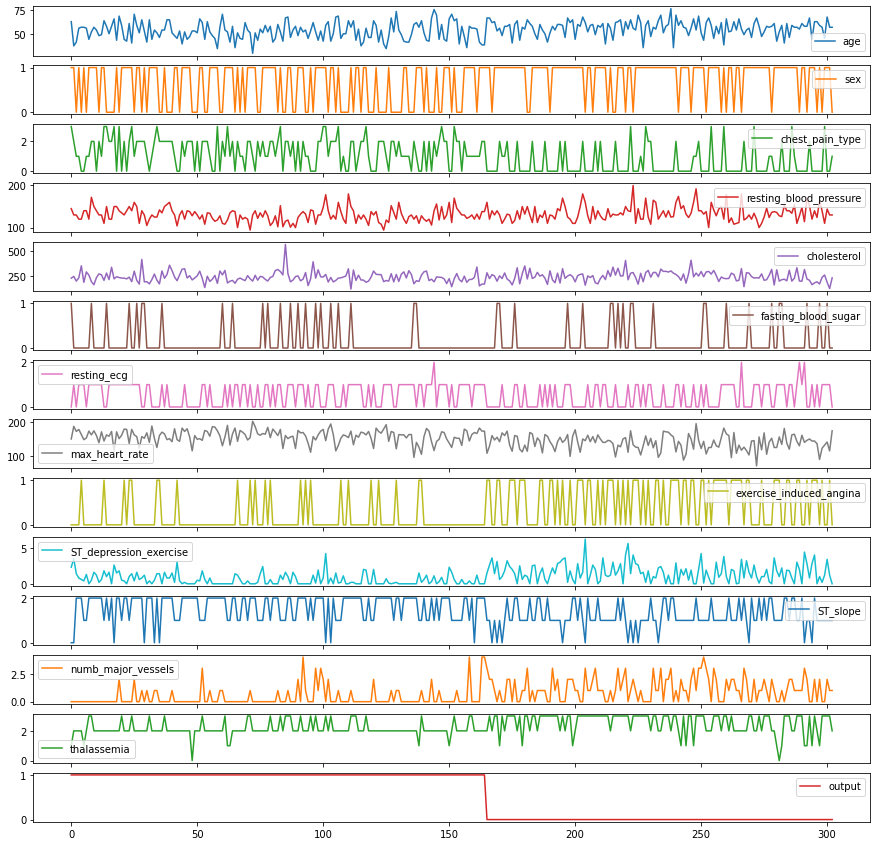

In [ ]:
df.plot(subplots=True, figsize = (15, 15))

Судя по графику выше, можно заметить, что некоторые признаки корреклируют с нашей целевой колонкой output. Сгруппирую их

### 2.7.2. Группировка

In [ ]:
columns_to_show = ['age','sex','chest_pain_type','fasting_blood_sugar','max_heart_rate',
                   'exercise_induced_angina','ST_depression_exercise','ST_slope',
                   'numb_major_vessels','thalassemia']

df.groupby('output')[columns_to_show].mean()

,age,sex,chest_pain_type,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,ST_depression_exercise,ST_slope,numb_major_vessels,thalassemia
output,,,,,,,,,,
0,56.601449,0.826087,0.478261,0.159420,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,0.139394,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


Посмотрим на график

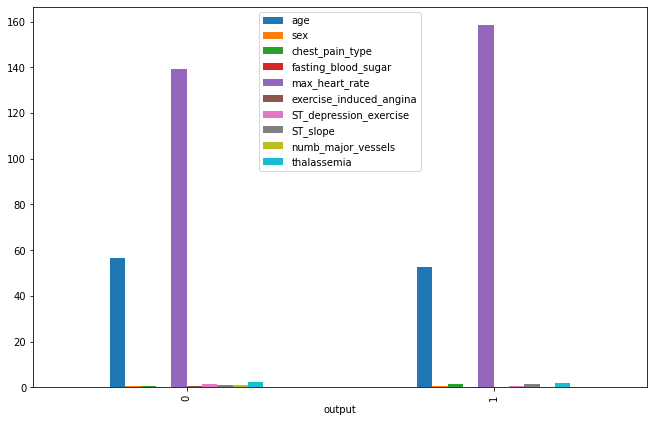

In [ ]:
columns_to_show = ['age','sex','chest_pain_type','fasting_blood_sugar','max_heart_rate',
                   'exercise_induced_angina','ST_depression_exercise','ST_slope',
                   'numb_major_vessels','thalassemia']

df.groupby('output')[columns_to_show].mean().plot(kind = 'bar',figsize = (11,7))

Отдельно посмотрю на малые и большие значения

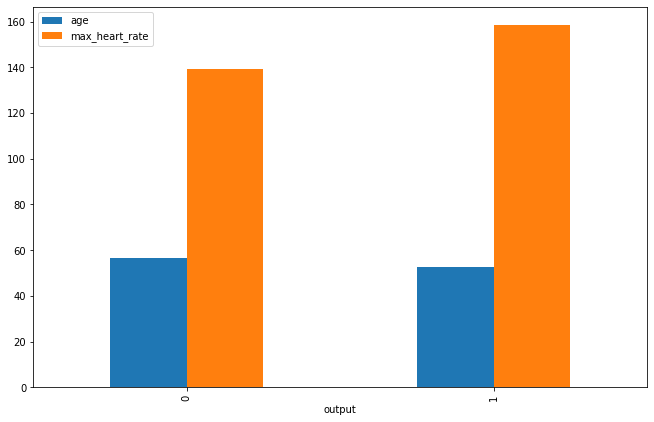

In [ ]:
columns_to_show = ['age','max_heart_rate']

df.groupby('output')[columns_to_show].mean().plot(kind = 'bar',figsize = (11,7))

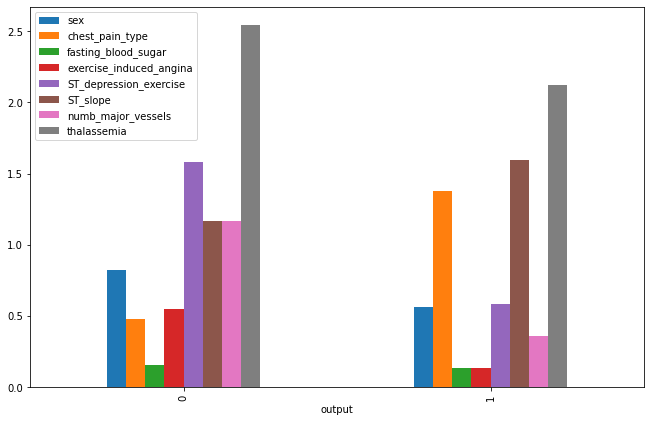

In [ ]:
columns_to_show = ['sex','chest_pain_type','fasting_blood_sugar',
                   'exercise_induced_angina','ST_depression_exercise','ST_slope',
                   'numb_major_vessels','thalassemia']

df.groupby('output')[columns_to_show].mean().plot(kind = 'bar',figsize = (11,7))

#### Краткие выводы

Можно сделать выводы, что:
1. Пол. У людей у которых риск развития сердеечно-сосудистого заболевания выше распределение по полу почти одинаковое, но смещено немного в сторону пола с категорией 1. У людей с полом 1 обладают большими шансами быть здоровыми

In [ ]:
df.groupby('output')['sex'].mean()

output
0    0.826087
1    0.563636
Name: sex, dtype: float64

2. Chest pain type:
Люди у которых боли в груди были с признаками между типичной стенокардиеей (0) и атипичной стенокардией (1) обладают меньшим шансом иметь сердечно-сосудистое заболевание. И наоборот, у людей у которых боль в груди носила характер не стенокардийной имеют больший шанс иметь заболевание. 

3. exercise induced angina:
У людей с большим риском заболевания стенокардия в среднем не была вызвана физ нагрузками. У людей с меньшим риском примерно у половины из них стенокардия была вызвана физ нагрузками и у другой половины не была.

4. Среднее значение ST_depression гораздо ниже у людей с риском развития ССЗ

In [ ]:
df.groupby('output')['ST_depression_exercise'].mean()

output
0    1.585507
1    0.583030
Name: ST_depression_exercise, dtype: float64

5. В среднем значения наклона в пиковой нагрузке ST сегмента наклонены вниз у людей с риском заболевания 

6. У людей с риском заболевания значение number of major vessels ниже, чем у противоположной группы

7. Средние значения людей с Талассемией примерно одинаковое

### 2.7.3. Гистограммы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefd327dbd0>,
      dtype=object)

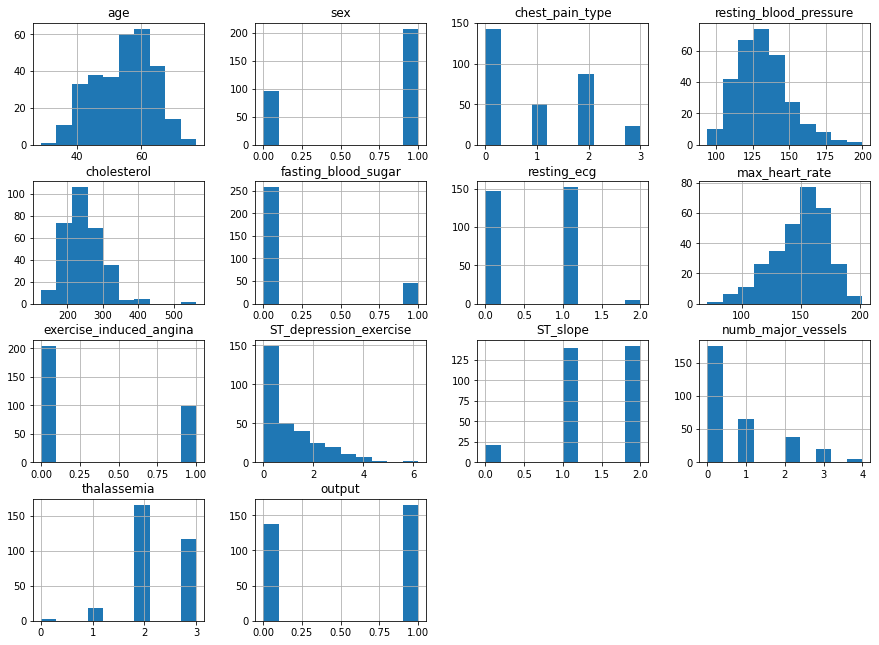

In [ ]:
df.hist(figsize = (15,11))

### 2.7.4. Pairplot

Весь датасет

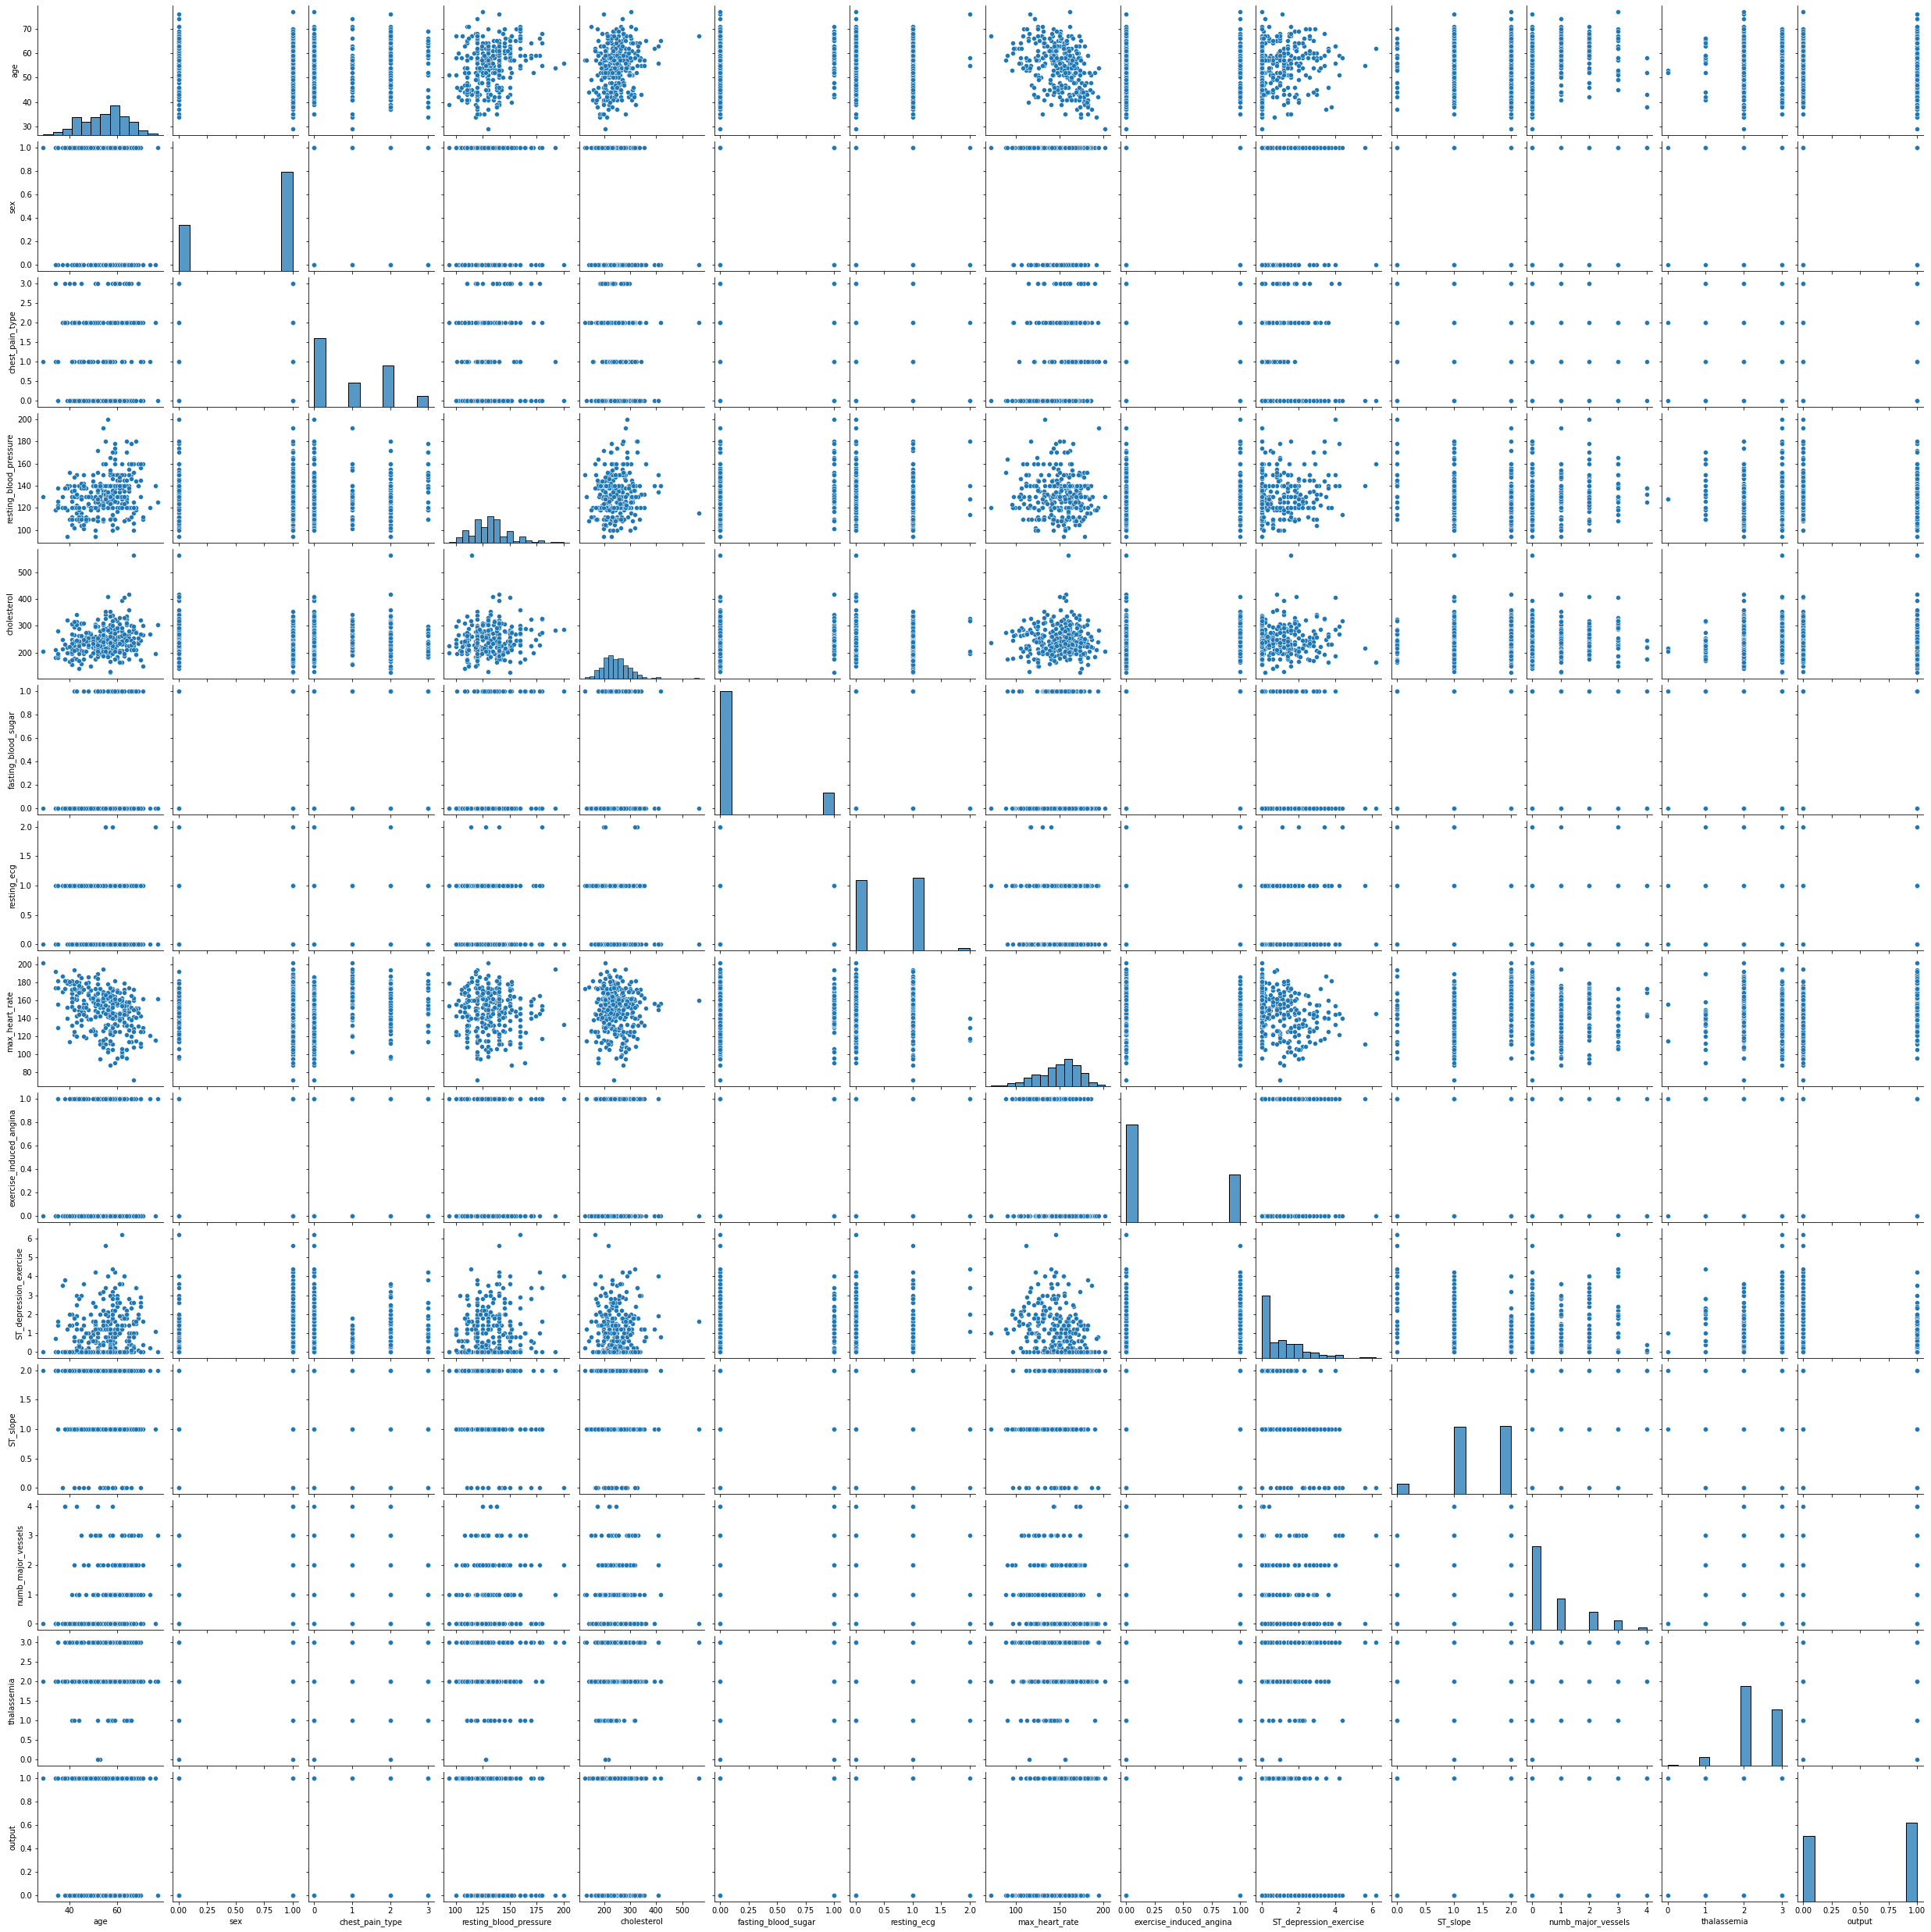

In [ ]:
sns.pairplot(df).savefig('/content/pairplot_allds.png')

Оставлю те признаки, что рассматривали выше и посмотрим на pairplot выборочных признаков

In [ ]:
significant_columns = ['age','sex','chest_pain_type','fasting_blood_sugar','max_heart_rate',
                   'exercise_induced_angina','ST_depression_exercise','ST_slope',
                   'numb_major_vessels','thalassemia','output']
df[significant_columns]

,age,sex,chest_pain_type,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,ST_depression_exercise,ST_slope,numb_major_vessels,thalassemia,output
0,63,1,3,1,150,0,2.3,0,0,1,1
1,37,1,2,0,187,0,3.5,0,0,2,1
2,41,0,1,0,172,0,1.4,2,0,2,1
3,56,1,1,0,178,0,0.8,2,0,2,1
4,57,0,0,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0,123,1,0.2,1,0,3,0
299,45,1,3,0,132,0,1.2,1,0,3,0
300,68,1,0,1,141,0,3.4,1,2,3,0
301,57,1,0,0,115,1,1.2,1,1,3,0


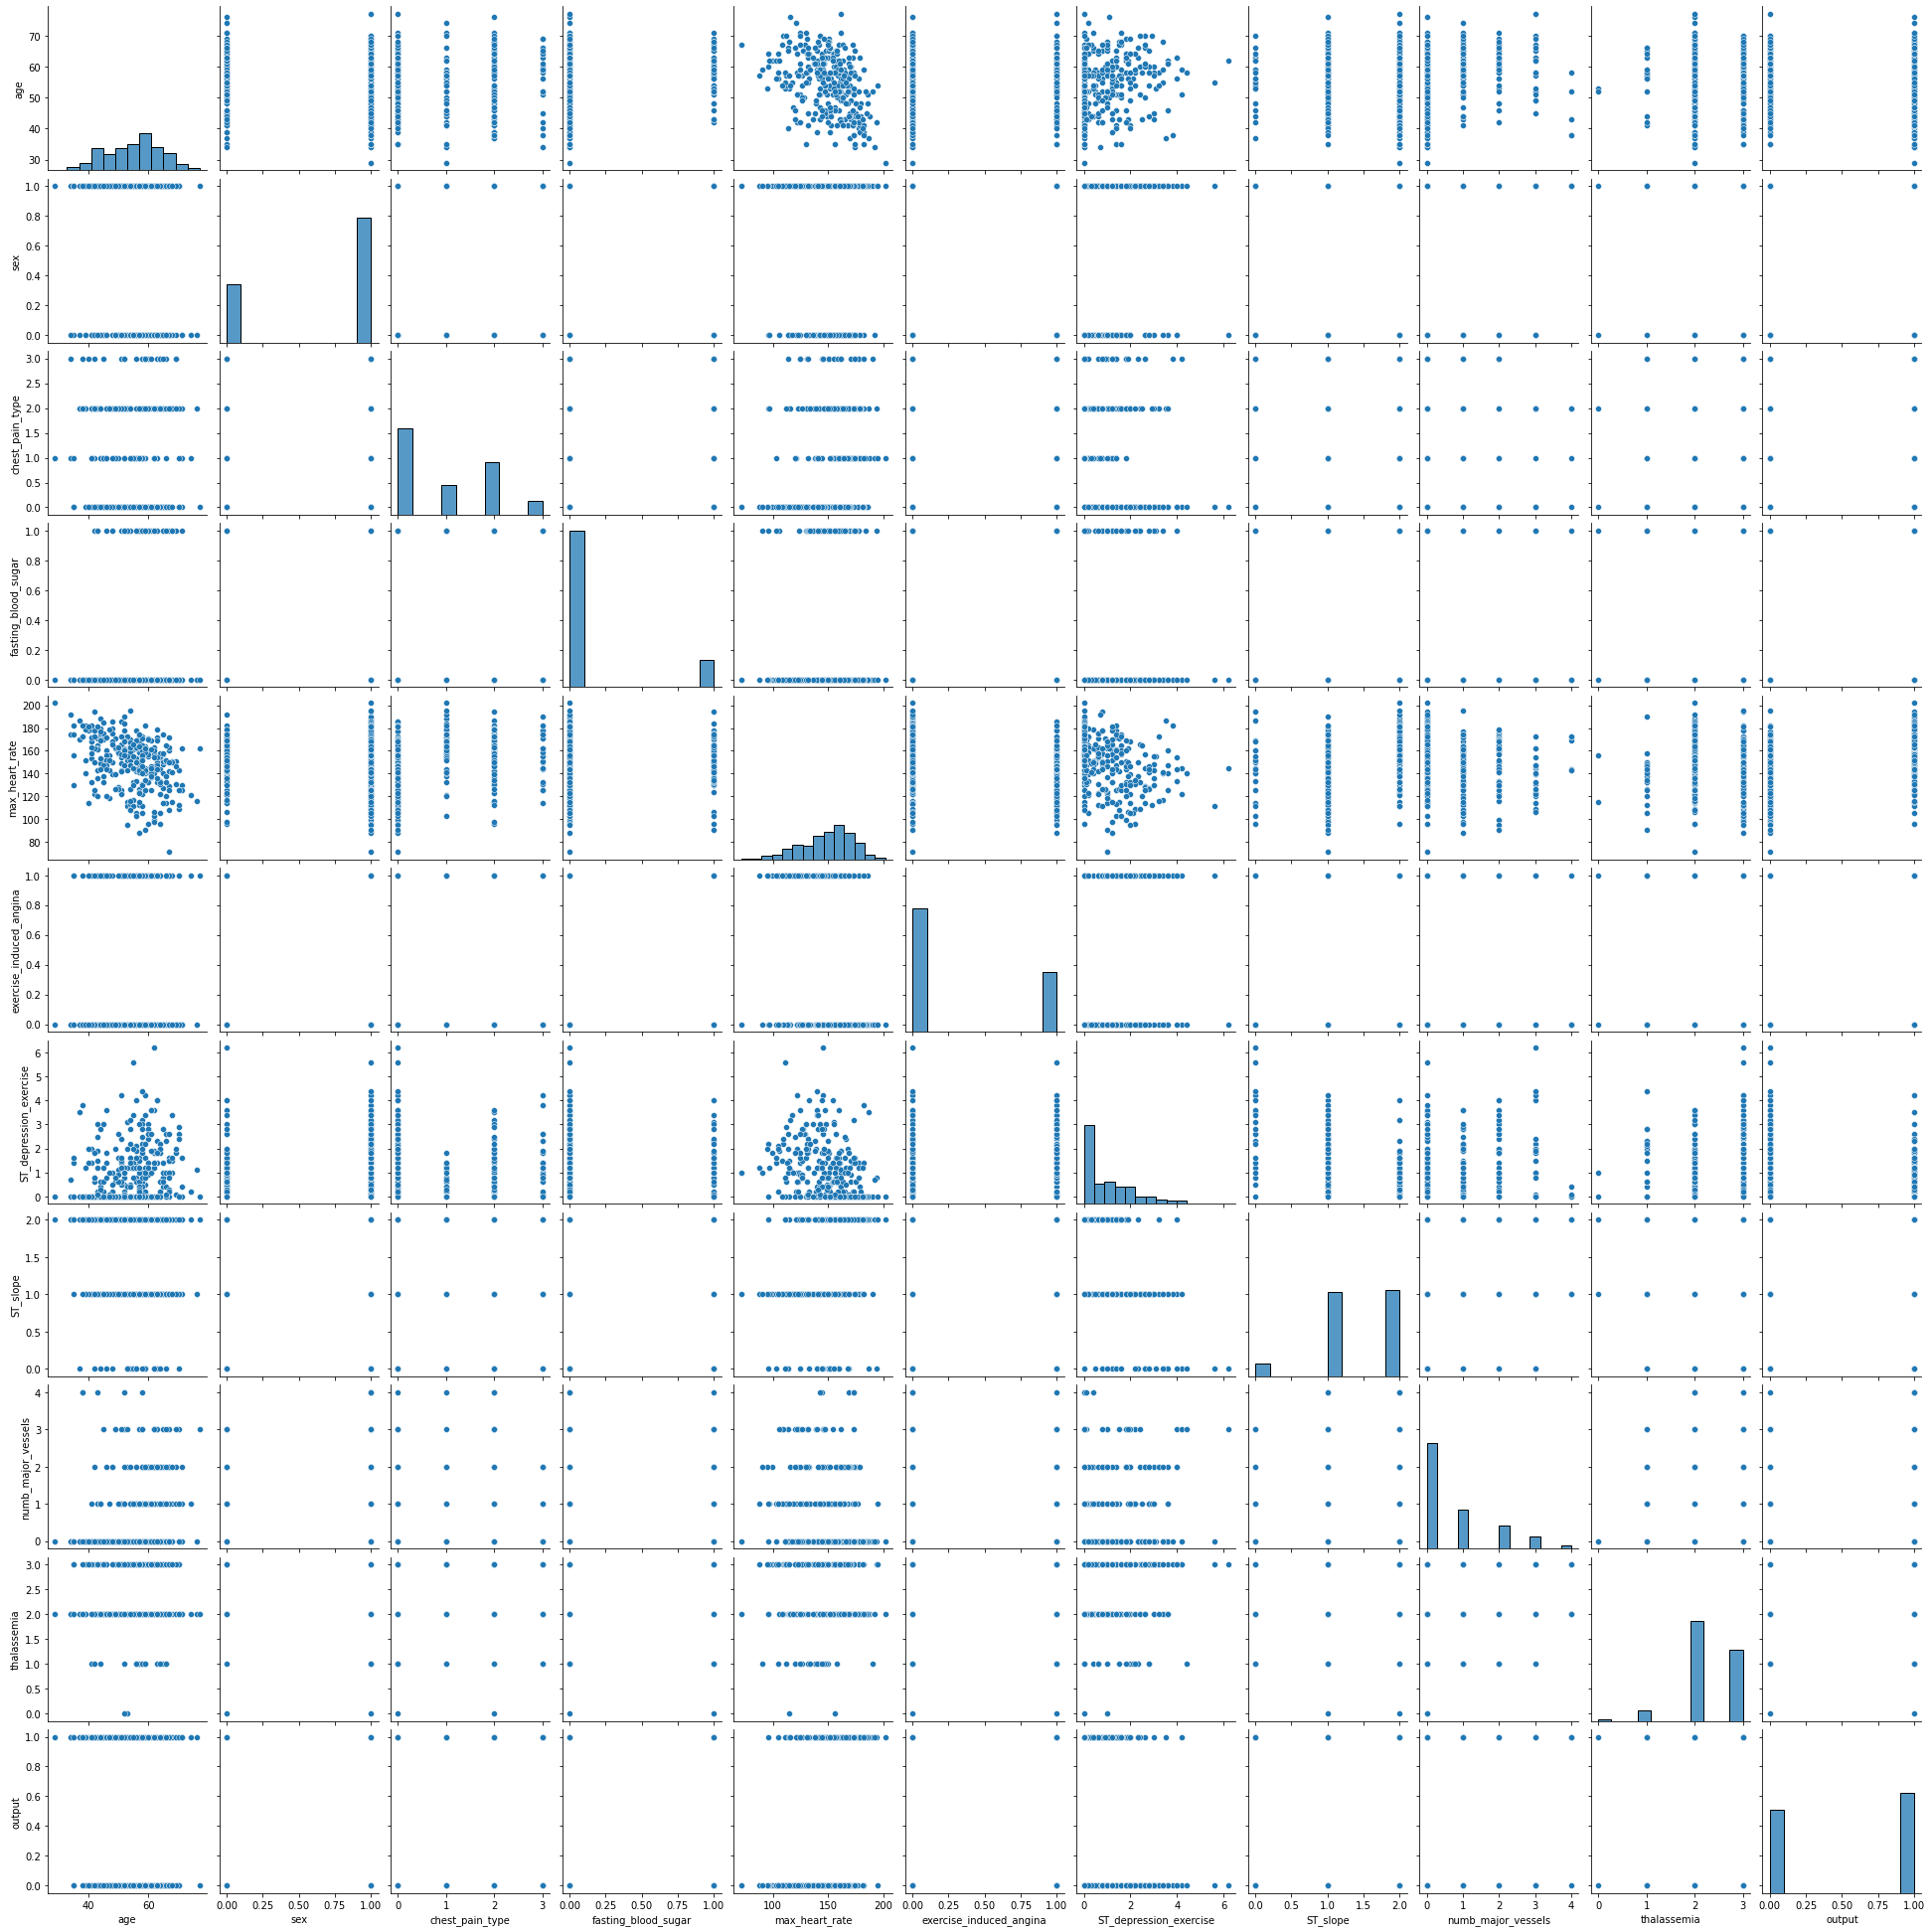

In [ ]:
sns.pairplot(df[significant_columns])

### 2.7.5. distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


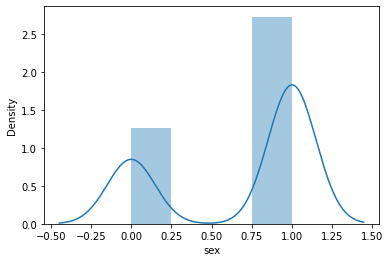

In [ ]:
sns.distplot(df['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


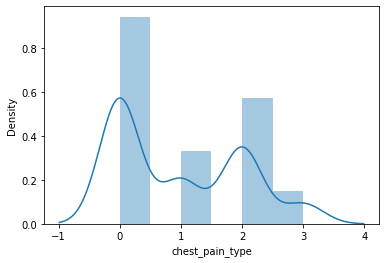

In [ ]:
sns.distplot(df['chest_pain_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


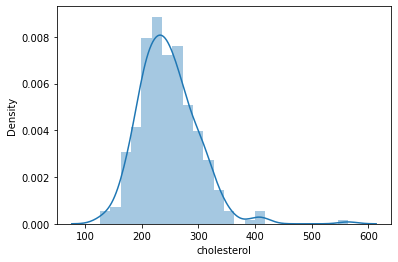

In [ ]:
sns.distplot(df['cholesterol'])

В тех х признаках, что я посмотрел на этих графиках,особых аномалих не обнаружил

### 2.7.6. jointplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


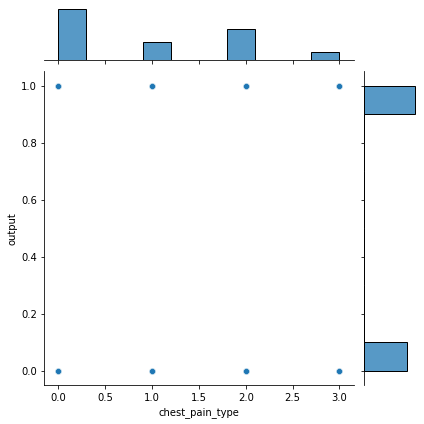

In [ ]:
sns.jointplot(df['chest_pain_type'], df['output'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


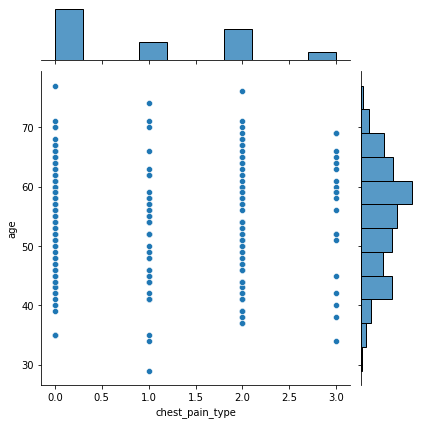

In [ ]:
sns.jointplot(df['chest_pain_type'], df['age'])

Так же тут ничего интересного

### 2.7.7. heatmap

In [ ]:
df.pivot_table(index='age', 
              columns='sex', 
              values='output',
              aggfunc='sum',
              fill_value = 0)

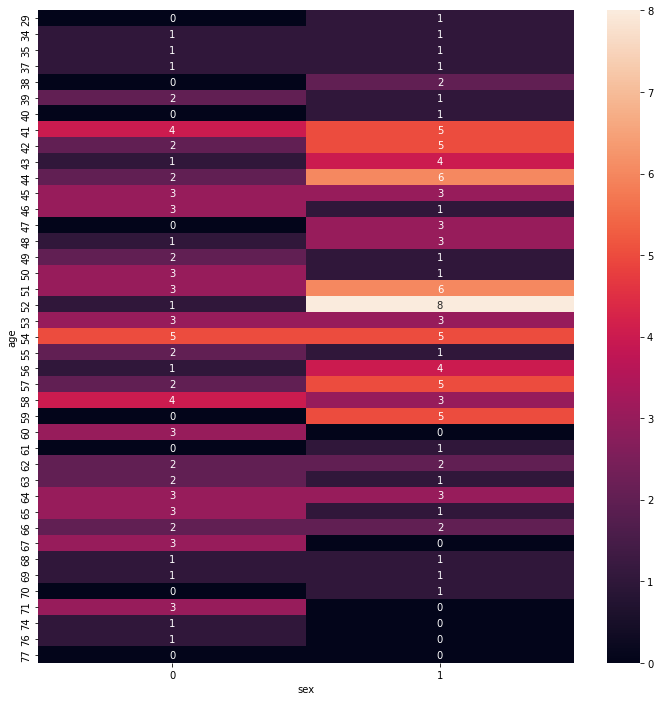

In [ ]:
table = df.pivot_table(index='age', 
                      columns='sex', 
                      values='output',
                      aggfunc='sum',
                      fill_value = 0)

figure(figsize=(12, 12))
sns.heatmap(table, annot=True)

Больше всего подвержены риску заболевания люди с полом 1 в возрасте от 40 до 60 лет. У пола 0 можно отметить что риск заболевания распределен равномерно от 40 до 70 лет

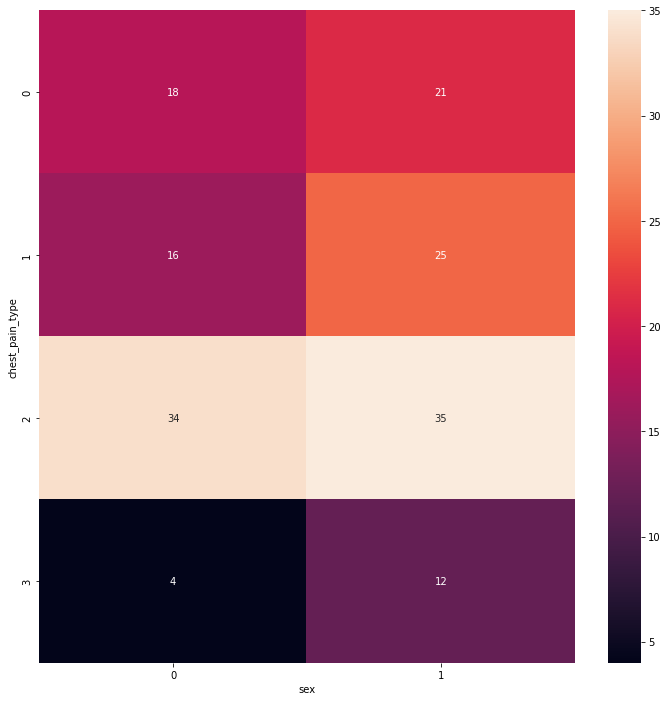

In [ ]:
table = df.pivot_table(index='chest_pain_type', 
                      columns='sex', 
                      values='output',
                      aggfunc='sum',
                      fill_value = 0)

figure(figsize=(12, 12))
sns.heatmap(table, annot=True)

Больше всего риску заболевания подвержеены оба пола с типом боли в груди = 2

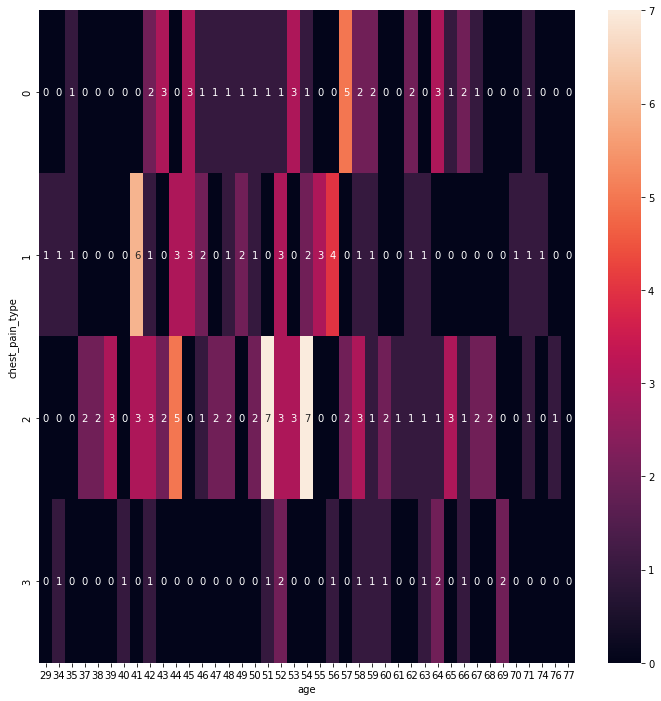

In [ ]:
table = df.pivot_table(index='chest_pain_type', 
                      columns='age', 
                      values='output',
                      aggfunc='sum',
                      fill_value = 0)

figure(figsize=(12, 12))
sns.heatmap(table, annot=True)

Как было замечено выше, возраст в котором повышен риск заболевания лежит в диапазоне примерно от 37 до 70 лет. В этом же диапазоне больше всего заболеваний при 2м типе боли в груди. При первом типе боли в груди возрастной диапазон сужается примерно с 40 до 55 лет. С нулевым типом боли в груди возрастной диапазон лежит от 40 до 66 лет с увеличением риска после 50 лет.

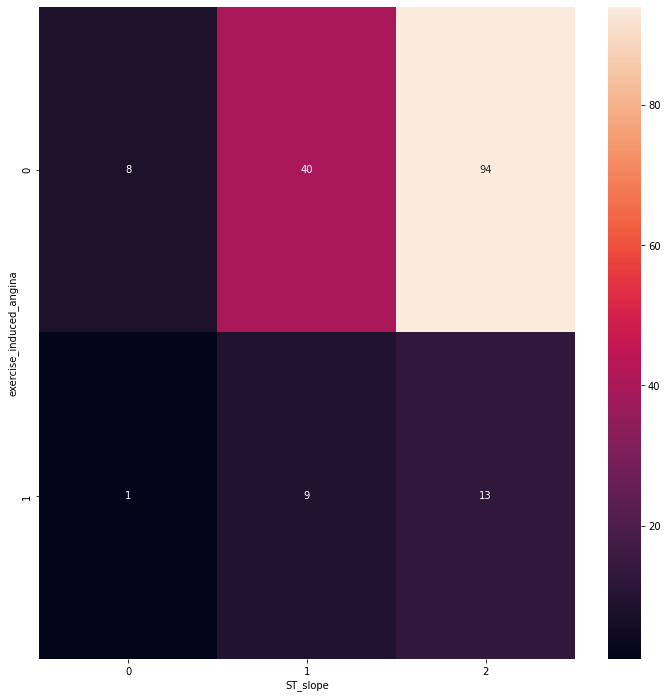

In [ ]:
table = df.pivot_table(index='exercise_induced_angina', 
                      columns='ST_slope', 
                      values='output',
                      aggfunc='sum',
                      fill_value = 0)

figure(figsize=(12, 12))
sns.heatmap(table, annot=True)

Прямой зависимости между стенокардией после тренировки и наклоном ST участка ЭКГ нет. У большинства заболевших не было стенокардии после физ активности

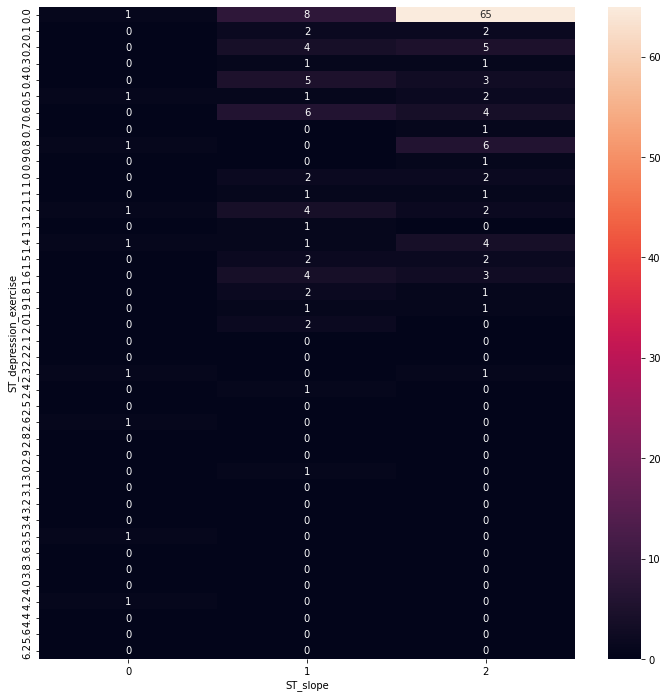

In [ ]:
table = df.pivot_table(index='ST_depression_exercise', 
                      columns='ST_slope', 
                      values='output',
                      aggfunc='sum',
                      fill_value = 0)

figure(figsize=(12, 12))
sns.heatmap(table, annot=True)

Больше всего подвержены риску заболевания люди с наклоном ST кривой вниз и у которых кривая ST наклонена вниз после упражнения

### 2.7.8. Матрица корреляций

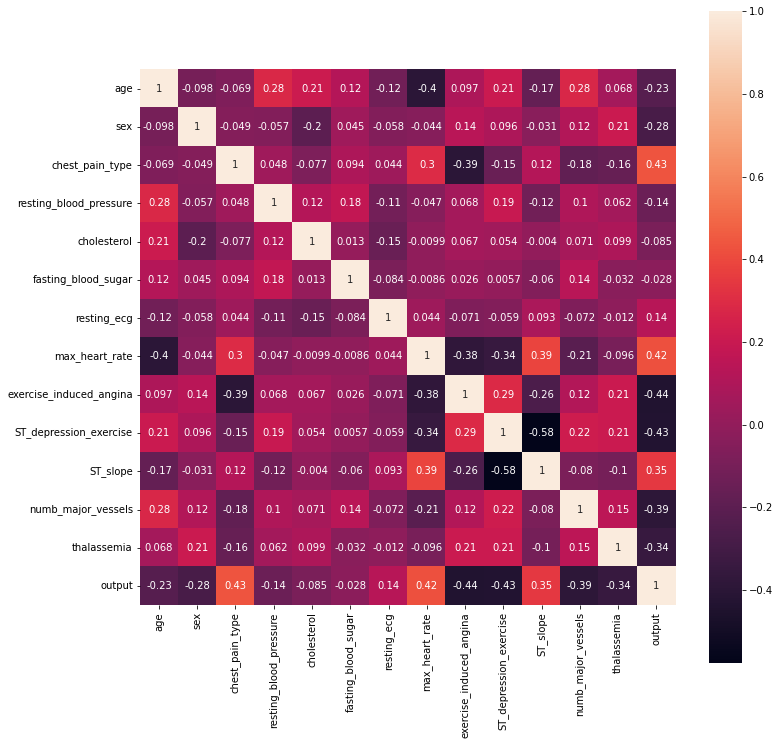

In [ ]:
figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True, square=True)

По матрице корреляций можно посмотреть на output и остальные признаки. Зависимость не идеальная между признаками.
1. Прямая зависимость наблюдается с принзаком chest_pain_type: чем сильнее боль отличается от типичной стенокардии тем вышее риск заболевания.
2. Прямая зависимость естьу Макс ЧСС и риском заболевания
3. Так же как было отмечено выше, есть прямая зависимость между наклоном ST кривой и заболеванием. Чем ниже наклон (больше число в датафрейме у признака) тем выше риск
4. Можно отметить, что обратную зависимость имеют признаки такие как стенокардия после упр, наклон ST кривой вниз после упр, количество главных артерий и заболевание талассемией.

# 3.Предобработка данных

## 3.0.Label Encoding для не бинарных типов данных

In [ ]:
from sklearn import preprocessing

def not_binary_columns (df):
  """Find columns with more than 2 features"""

  columns_to_encode = []

  for column in df.columns:
    if df[column].value_counts().size != 2:
      columns_to_encode.append(column)

  return columns_to_encode


def label_encoder (df):
  """ Label Encoding for each column of data frame """

  encoded_df = df.copy() # копируем нашу исходную таблицу
  columns_to_encode = not_binary_columns(df) # находим названия столбцов, котоыре будем кодировать
  le = preprocessing.LabelEncoder() # инициализация LabelEncoder

  for column in columns_to_encode:
    encoded_df[column] = le.fit_transform(encoded_df[column]) # применяем кодировщик к столбцу и перезаписываем столбец
  
  return encoded_df

In [ ]:
encoded_df = label_encoder(df)
encoded_df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression_exercise,ST_slope,numb_major_vessels,thalassemia,output
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23,0,0,28,71,0,1,23,1,2,1,0,3,0
299,11,1,3,8,93,0,1,32,0,12,1,0,3,0
300,34,1,0,30,26,1,1,40,0,31,1,2,3,0
301,23,1,0,22,1,0,1,16,1,12,1,1,3,0


In [ ]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression_exercise,ST_slope,numb_major_vessels,thalassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.ST_depression_exercise.value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: ST_depression_exercise, dtype: int64

In [ ]:
encoded_df.ST_depression_exercise.value_counts()

0     99
12    17
10    14
6     14
14    13
8     13
2     12
16    11
17    10
4      9
19     9
1      7
26     6
25     6
15     5
28     5
18     5
5      5
33     4
21     4
23     3
9      3
31     3
35     3
3      3
22     2
30     2
24     2
36     2
11     2
29     1
7      1
32     1
39     1
13     1
38     1
27     1
20     1
34     1
37     1
Name: ST_depression_exercise, dtype: int64

График плотности распределения по признаку ST_depression_exercise до перекодирования Label Encoder'ом

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


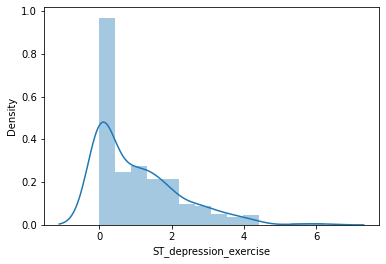

In [ ]:
sns.distplot(df.ST_depression_exercise)

Обычный график по признаку ST_depression_exercise до перекодирования Label Encoder'ом

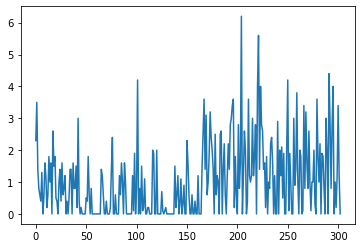

In [ ]:
df.ST_depression_exercise.plot()

График плотности распределения по признаку ST_depression_exercise после перекодирования Label Encoder'ом

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


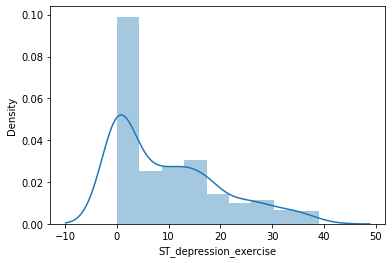

In [ ]:
sns.distplot(encoded_df.ST_depression_exercise)

Обычный график по признаку ST_depression_exercise после перекодирования Label Encoder'ом

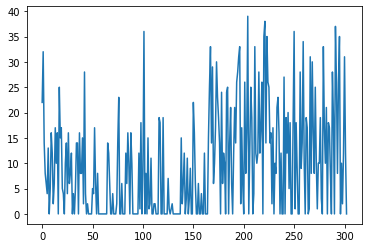

In [ ]:
encoded_df.ST_depression_exercise.plot()

## 3.1. Разбиваем данные на X и y

Далее я отдельно буду выделять данные которые были закодированы и те что не были. Обучу алгоритм на обоих типах и в конце сравню метрики между получившимися результатами и сделаю вывод, на каких данных алгоритм лучше обучился

### 3.1.1. Перекодированные данные

In [ ]:
X_encoded = np.array(encoded_df.iloc[:,0:-1]) # слайсим до последнего столбца и преобразовываем в numpy массив

In [ ]:
X_encoded

array([[29,  1,  3, ...,  0,  0,  1],
       [ 3,  1,  2, ...,  0,  0,  2],
       [ 7,  0,  1, ...,  2,  0,  2],
       ...,
       [34,  1,  0, ...,  1,  2,  3],
       [23,  1,  0, ...,  1,  1,  3],
       [23,  0,  1, ...,  1,  1,  2]])

### 3.1.2. НЕ кодированные данные

In [ ]:
X_default = np.array(df.iloc[:,0:-1]) # слайсим до последнего столбца и преобразовываем в numpy массив

In [ ]:
X_default

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

### 3.1.3 Для y без разницы с какого дата фрейма брать, тк я эту колонку не трогал Label Encoder'ом

In [ ]:
y = encoded_df.output.values # берем последний столбец и преобразовываем в numpy массив с помощью values

In [ ]:
encoded_df.output.values == df.output.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## 3.2. Нормализация

Стандартизация

### 3.2.1. Label Encoded data

In [ ]:
from sklearn.preprocessing import scale
X_encoded_scaled = scale(np.array(X_encoded, dtype='float'), with_std=True, with_mean=True)

In [ ]:
X_encoded_scaled

array([[ 0.96637893,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.94718143,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.49894138, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.526679  ,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29401885,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29401885, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

### 3.2.1. No label encoded data

In [ ]:
X_default_scaled = scale(np.array(X_default, dtype='float'), with_std=True, with_mean=True)

In [ ]:
X_default_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# 4.Обучение алгоритма KNN

## 4.1.  Подбор параметров с помощью GridSearch

In [ ]:
# Будем использовать модель k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# В sklearn есть специальный модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV

# инициализируем алгоритм
knn = KNeighborsClassifier()

In [ ]:
# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.array(np.linspace(1, 50, 20), dtype='int'),
            'weights':np.array(['uniform','distance']),
            'algorithm':np.array(['auto', 'ball_tree', 'kd_tree', 'brute']),
            'metric':np.array(['cityblock','euclidean','l1','l2','manhattan'])} # перебираем по параметрам n_neighbors, weights, algorithm, metric

# Создаем объект кросс-валидации
gs_enc = GridSearchCV(knn, knn_grid) # для encoded data
gs_def = GridSearchCV(knn, knn_grid) # для неперекодированных данных

# Обучаем его
gs_enc.fit(X_encoded_scaled, y) # для encoded data
gs_def.fit(X_default_scaled, y) # для неперекодированных данных

print(f'Params for GridSearch with label encoded data:\n best_params : {gs_enc.best_params_},\n \
 best_score:{gs_enc.best_score_}')

print('\n')

print(f'Params for GridSearch without label encoded data:\n best_params : {gs_def.best_params_},\n \
 best_score:{gs_def.best_score_}')

Params for GridSearch with label encoded data:
 best_params : {'algorithm': 'auto', 'metric': 'cityblock', 'n_neighbors': 6, 'weights': 'uniform'},
  best_score:0.8383060109289617


Params for GridSearch without label encoded data:
 best_params : {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 26, 'weights': 'uniform'},
  best_score:0.8414207650273224


Результат на графике для encoded data

Text(0.5, 1.0, 'Зависимость между количеством соседей и средним результатом')

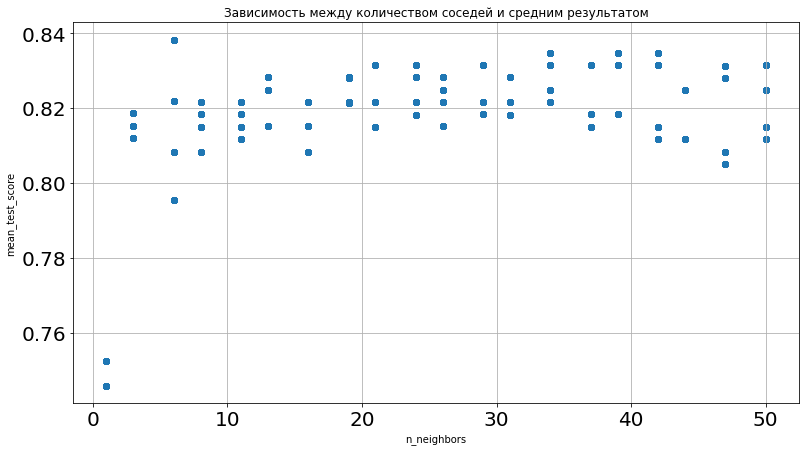

In [ ]:
plt.figure(figsize=(13,7))
plt.scatter(gs_enc.cv_results_['param_n_neighbors'].data, gs_enc.cv_results_['mean_test_score'])
plt.grid(True)
plt.xlabel('n_neighbors')
plt.ylabel('mean_test_score')
plt.title('Зависимость между количеством соседей и средним результатом')

Результат на графике для default data

Text(0.5, 1.0, 'Зависимость между количеством соседей и средним результатом')

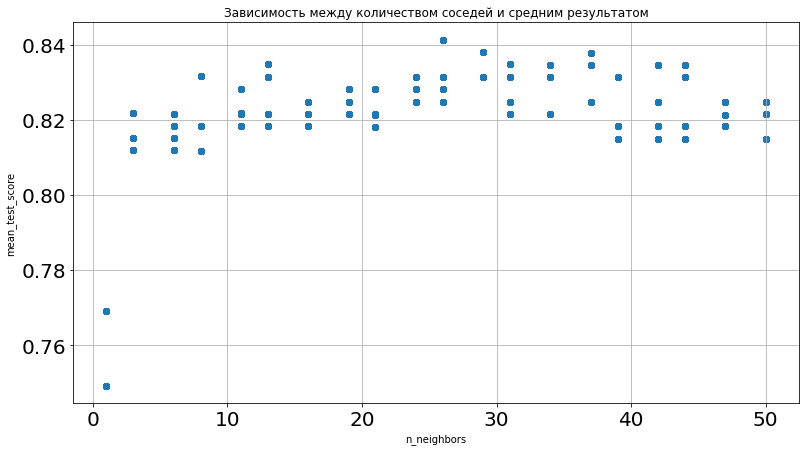

In [ ]:
plt.figure(figsize=(13,7))
plt.scatter(gs_def.cv_results_['param_n_neighbors'].data, gs_def.cv_results_['mean_test_score'])
plt.grid(True)
plt.xlabel('n_neighbors')
plt.ylabel('mean_test_score')
plt.title('Зависимость между количеством соседей и средним результатом')

## 4.2.Метрики

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Метрики для encoded data

In [ ]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded_scaled, y, test_size=0.2)

In [ ]:
y_predict_test_from_encoded = gs_enc.predict(X_test_encoded)

In [ ]:
print(f'accuracy_score = {metrics.accuracy_score(y_test_encoded, y_predict_test_from_encoded)}')
print(f'precision_score = {metrics.precision_score(y_test_encoded, y_predict_test_from_encoded)}')
print(f'recall_score = {metrics.recall_score(y_test_encoded, y_predict_test_from_encoded)}')
print(f'f1_score = {metrics.f1_score(y_test_encoded, y_predict_test_from_encoded)}')
print('\n')
print(f'classification_report:\n\n {metrics.classification_report(y_test_encoded, y_predict_test_from_encoded)}')

accuracy_score = 0.819672131147541
precision_score = 0.84375
recall_score = 0.8181818181818182
f1_score = 0.8307692307692308


classification_report:

               precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Confusion matrix

[[23  5]
 [ 6 27]]


Text(0.5, 42.0, 'Predicted value')

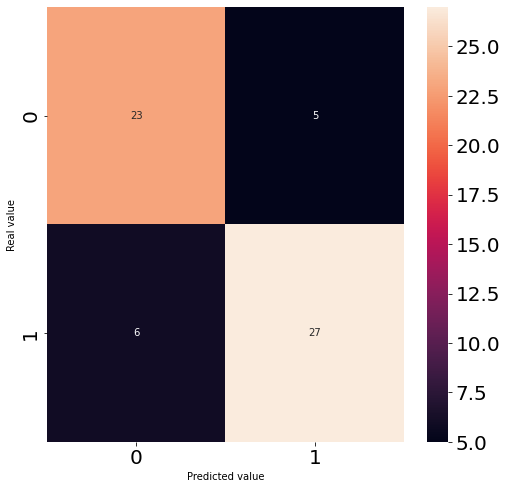

In [ ]:
import matplotlib
# нужно получить кол-во правильных и неправильых предсказаний по каждому классу 

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test_encoded, y_predict_test_from_encoded)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
sns.heatmap(nn_mtx, annot=True)

plt.ylabel("Real value")
plt.xlabel("Predicted value")

AUC-ROC

In [ ]:
fpr,tpr, thresholds = metrics.roc_curve(y_test_encoded, y_predict_test_from_encoded)

ROC-AUC = 0.8198051948051949


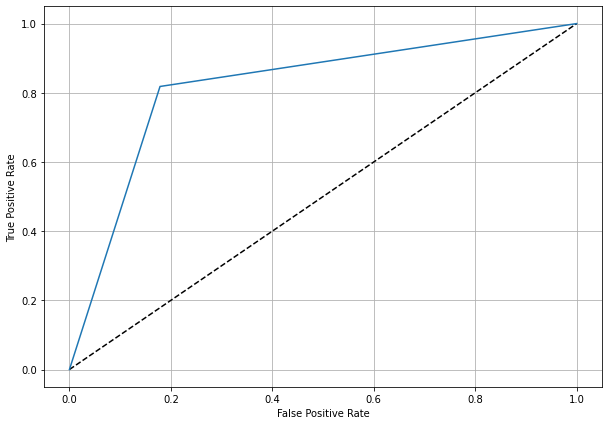

In [ ]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
# (результат плохой у монетки roc auc = 0.5, см classification report f1, классы разбалансированны)

print(f'roc_auc_score = {metrics.roc_auc_score(y_test_encoded, y_predict_test_from_encoded)}')

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)

PR-curve

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test_encoded, y_predict_test_from_encoded)

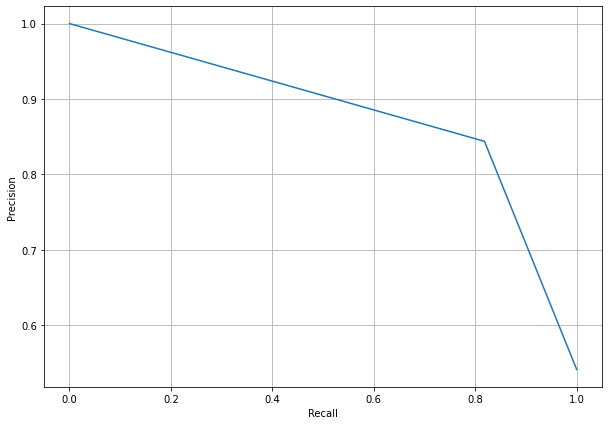

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.grid(True)

### Метрики для default data

In [ ]:
X_train_default, X_test_default, y_train_default, y_test_default = train_test_split(X_default_scaled, y, test_size=0.2)

In [ ]:
y_predict_test_from_default = gs_def.predict(X_test_default)

In [ ]:
print(f'accuracy_score = {metrics.accuracy_score(y_test_default, y_predict_test_from_default)}')
print(f'precision_score = {metrics.precision_score(y_test_default, y_predict_test_from_default)}')
print(f'recall_score = {metrics.recall_score(y_test_default, y_predict_test_from_default)}')
print(f'f1_score = {metrics.f1_score(y_test_default, y_predict_test_from_default)}')
print('\n')
print(f'classification_report:\n\n {metrics.classification_report(y_test_default, y_predict_test_from_default)}')

accuracy_score = 0.8360655737704918
precision_score = 0.8048780487804879
recall_score = 0.9428571428571428
f1_score = 0.868421052631579


classification_report:

               precision    recall  f1-score   support

           0       0.90      0.69      0.78        26
           1       0.80      0.94      0.87        35

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61



Confusion matrix

[[18  8]
 [ 2 33]]


Text(0.5, 42.0, 'Predicted value')

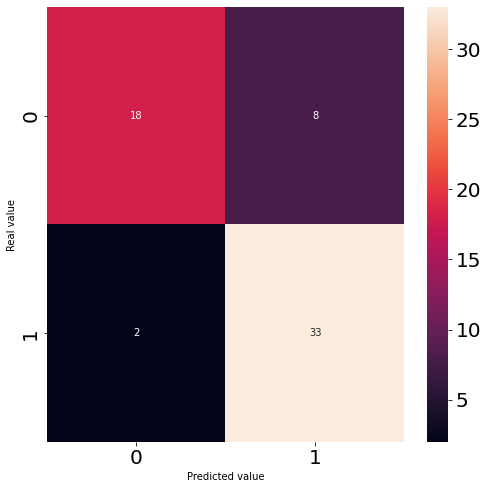

In [ ]:
import matplotlib
# нужно получить кол-во правильных и неправильых предсказаний по каждому классу 

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test_default, y_predict_test_from_default)
print(nn_mtx)

sns.heatmap(nn_mtx, annot=True)

plt.ylabel("Real value")
plt.xlabel("Predicted value")

AUC-ROC

In [ ]:
fpr,tpr, thresholds = metrics.roc_curve(y_test_default, y_predict_test_from_default)

ROC-AUC = 0.8175824175824176


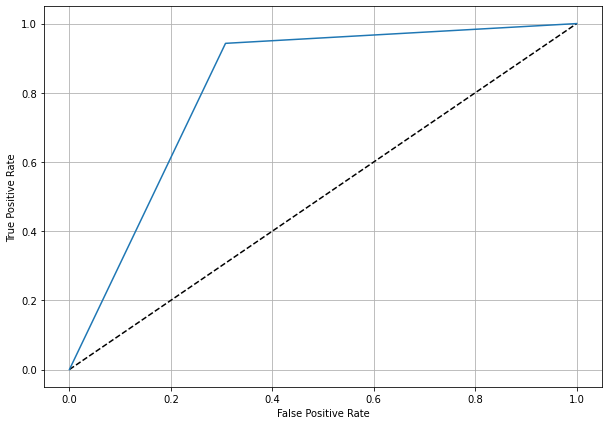

In [ ]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
# (результат плохой у монетки roc auc = 0.5, см classification report f1, классы разбалансированны)

print(f'roc_auc_score = {metrics.roc_auc_score(y_test_default, y_predict_test_from_default)}')

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)

PR-curve

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test_default, y_predict_test_from_default)

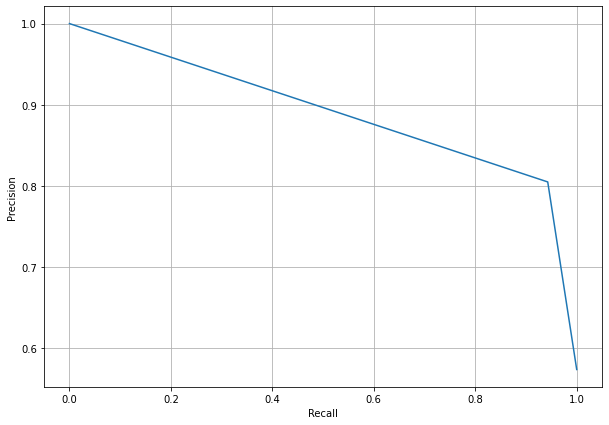

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.grid(True)

### Сравню метрики для тестовых данных между encoded и default

In [ ]:
accuracy_score_test_encoded = metrics.accuracy_score(y_test_encoded, y_predict_test_from_encoded)
precision_score_test_encoded  = metrics.precision_score(y_test_encoded, y_predict_test_from_encoded)
recall_score_test_encoded  = metrics.recall_score(y_test_encoded, y_predict_test_from_encoded)
f1_score_test_encoded  = metrics.f1_score(y_test_encoded, y_predict_test_from_encoded)
roc_auc_score_test_encoded  = metrics.roc_auc_score(y_test_encoded, y_predict_test_from_encoded)

In [ ]:
accuracy_score_test_default = metrics.accuracy_score(y_test_default, y_predict_test_from_default)
precision_score_test_default  = metrics.precision_score(y_test_default, y_predict_test_from_default)
recall_score_test_default  = metrics.recall_score(y_test_default, y_predict_test_from_default)
f1_score_test_default = metrics.f1_score(y_test_default, y_predict_test_from_default)
roc_auc_score_test_default  = metrics.roc_auc_score(y_test_default, y_predict_test_from_default)

In [ ]:
y_ax = np.array(['accuracy_score_test','precision_score_test','recall_score_test','f1_score_test','roc_auc_score_test'])

In [ ]:
test_encoded = np.array([accuracy_score_test_encoded, precision_score_test_encoded, recall_score_test_encoded, f1_score_test_encoded,roc_auc_score_test_encoded])
test_encoded

array([0.81967213, 0.84375   , 0.81818182, 0.83076923, 0.81980519])

In [ ]:
test_default = np.array([accuracy_score_test_default, precision_score_test_default, recall_score_test_default, f1_score_test_default,roc_auc_score_test_default])
test_default

array([0.83606557, 0.80487805, 0.94285714, 0.86842105, 0.81758242])

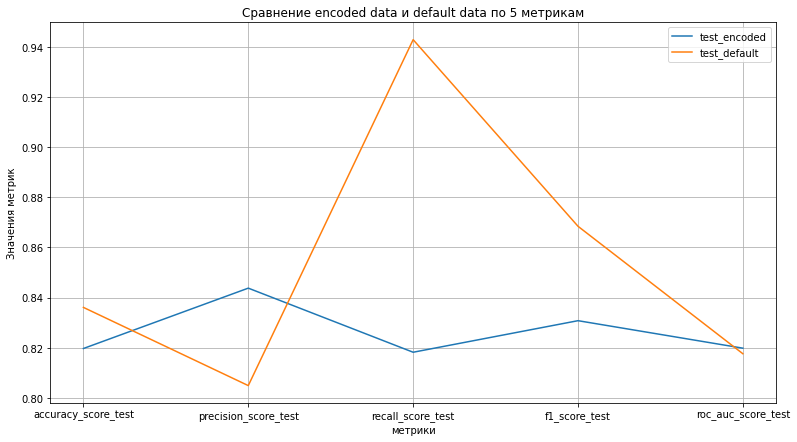

In [ ]:
plt.figure(figsize=(13,7))
plt.plot(y_ax, test_encoded, label = 'test_encoded')
plt.plot(y_ax, test_default, label = 'test_default')
plt.xlabel('метрики')
plt.ylabel('Значения метрик')
plt.title('Сравнение encoded data и default data по 5 метрикам')
plt.legend()
plt.grid(True)

Как видно из графика ( или из массивов) значения 3х метрик у test_default выше чем у test_encoded. Test_default  - это данные которые не были подвержены label encoding'y, а test_encoded были (у них были закодированы все столбцы с числовыми признаками, бинарные не трогал)

1. У test_default сильно ниже только precision_score. precision_score демонстрирует способность отличать один класс от другого. 

2. Зато recall_score cильно выше у него. Эта метрика демонстрирует способность алгоритма обнаруживать класс вообще

3. Как следствие f1_score у testt_default получился выше чем у testt_encoded. Эта метрика является гармоническим средним между precision и recall

4. roc_auc у default_test чуть чуть ниже чем у encoded. Разница заметна только в 3м знаке посля запятой, можно сказать они равны

Вывод: алгоритм показал результат лучше с незакодированными данными

## 4.3. Подбор параметров вручную

### 4.3.1. Возьму n_neighbors = 28

In [ ]:
# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', weights = 'uniform',
                           n_neighbors=28) 
# тренируем для knn
clf_knn = knn.fit(X_train, y_train)
# получаем от них предикты
y_knn = clf_knn.predict(X_test)

In [ ]:
# ответы knn
y_knn

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
# реальные ответы
y_test

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

#### Accuracy

In [ ]:
accuracy_score_nn_28 = metrics.accuracy_score(y_test, y_knn)
accuracy_score_nn_28

0.7868852459016393

#### Confusion matrix

nn_mtx = [[20  8]
 [ 5 28]]


Text(0.5, 51.0, 'Predicted value')

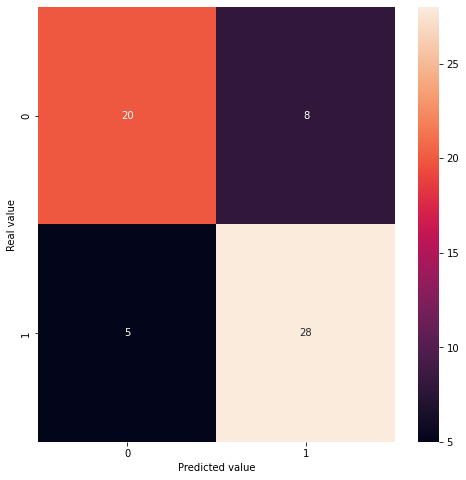

In [ ]:
# нужно получить кол-во правильных и неправильых предсказаний по каждому классу от knn

nn_mtx = metrics.confusion_matrix(y_test, y_knn)
print(f'nn_mtx = {nn_mtx}')

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

#### Precision

In [ ]:
precision_nn_28 = metrics.precision_score(y_test, y_knn)
precision_nn_28

0.7777777777777778

#### Recall

In [ ]:
recall_nn_28 = metrics.recall_score(y_test, y_knn)
recall_nn_28

0.8484848484848485

#### F-1

In [ ]:
f1_score_nn_28 = metrics.f1_score(y_test, y_knn)
f1_score_nn_28

0.8115942028985507

In [ ]:
print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



#### AUC-ROC

In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_test, y_knn)

In [ ]:
fpr

array([0.        , 0.28571429, 1.        ])

In [ ]:
tpr

array([0.        , 0.84848485, 1.        ])

ROC-AUC = 0.7813852813852814


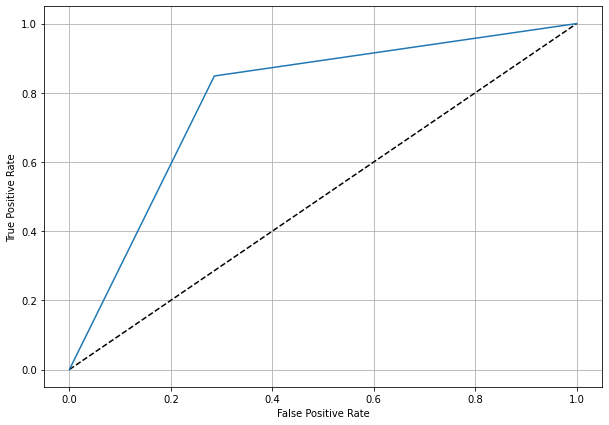

In [ ]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
# (результат плохой у монетки roc auc = 0.5, см classification report f1, классы разбалансированны)

print(f'ROC-AUC = {metrics.roc_auc_score(y_test,y_knn)}')

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)

#### PR-Curve

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_knn)

In [ ]:
precision

array([0.54098361, 0.77777778, 1.        ])

In [ ]:
recall

array([1.        , 0.84848485, 0.        ])

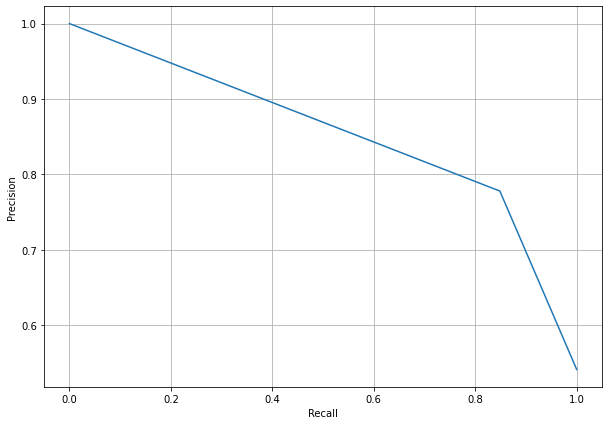

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.grid(True)

Попробую построить PR-Curve с помощью встроенного модуля в sklearn

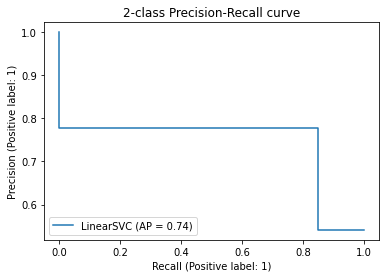

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(y_test, y_knn, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

### 4.3.2. Возьму n_neighbors = 26

In [ ]:
# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', weights = 'uniform',
                           n_neighbors=26) 
# тренируем для knn
clf_knn = knn.fit(X_train, y_train)
# получаем от них предикты
y_knn = clf_knn.predict(X_test)

#### Accuracy

In [ ]:
accuracy_score_nn_26 = metrics.accuracy_score(y_test, y_knn)
accuracy_score_nn_26

0.7704918032786885

#### Confusion matrix

nn_mtx = [[19  9]
 [ 5 28]]


Text(0.5, 51.0, 'Predicted value')

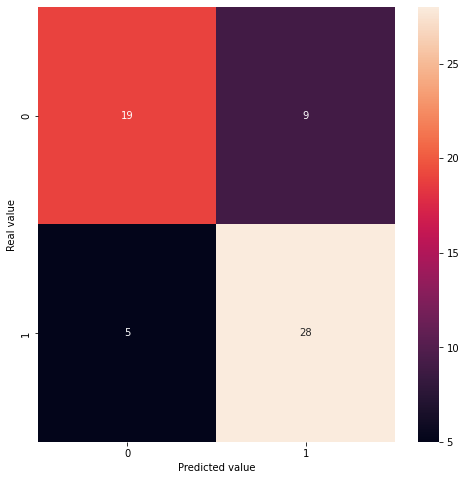

In [ ]:
# нужно получить кол-во правильных и неправильых предсказаний по каждому классу от knn

nn_mtx = metrics.confusion_matrix(y_test, y_knn)
print(f'nn_mtx = {nn_mtx}')

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

#### Precision

In [ ]:
precision_nn_26 = metrics.precision_score(y_test, y_knn)
precision_nn_26

0.7567567567567568

#### Recall

In [ ]:
recall_nn_26 = metrics.recall_score(y_test, y_knn)
recall_nn_26

0.8484848484848485

#### F-1

In [ ]:
f1_score_nn_26 = metrics.f1_score(y_test, y_knn)
f1_score_nn_26

0.8000000000000002

In [ ]:
print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



#### AUC-ROC

In [ ]:
fpr,tpr, thresholds = metrics.roc_curve(y_test, y_knn)

In [ ]:
fpr

array([0.        , 0.32142857, 1.        ])

In [ ]:
tpr

array([0.        , 0.84848485, 1.        ])

ROC-AUC = 0.7635281385281386


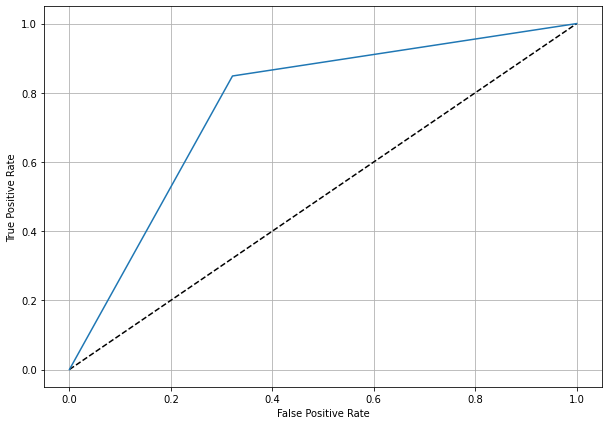

In [ ]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
# (результат плохой у монетки roc auc = 0.5, см classification report f1, классы разбалансированны)

print(f'ROC-AUC = {metrics.roc_auc_score(y_test,y_knn)}')

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)

#### PR-Curve

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_knn)

In [ ]:
precision

array([0.54098361, 0.75675676, 1.        ])

In [ ]:
recall

array([1.        , 0.84848485, 0.        ])

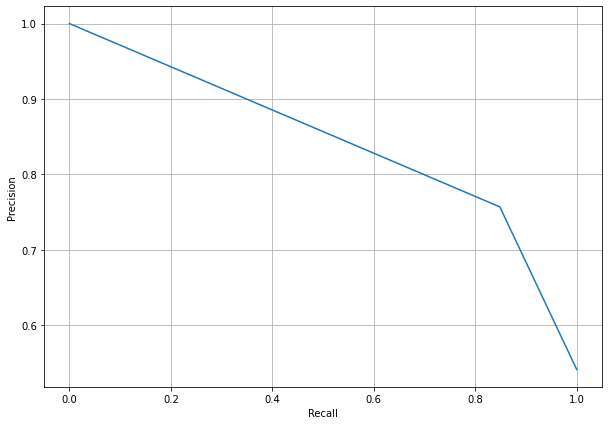

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.grid(True)

### 4.3.3. Возьму n_neighbors = 22

In [ ]:
# Будем использовать модель k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', weights = 'uniform',
                           n_neighbors=22)
# тренируем для knn
clf_knn = knn.fit(X_train, y_train)
# получаем от них предикты
y_knn = clf_knn.predict(X_test)

#### Accuracy

In [ ]:
accuracy_score_nn_22 = metrics.accuracy_score(y_test, y_knn)
accuracy_score_nn_22

0.8032786885245902

#### Confusion matrix

nn_mtx = [[22 10]
 [ 2 27]]


Text(0.5, 51.0, 'Predicted value')

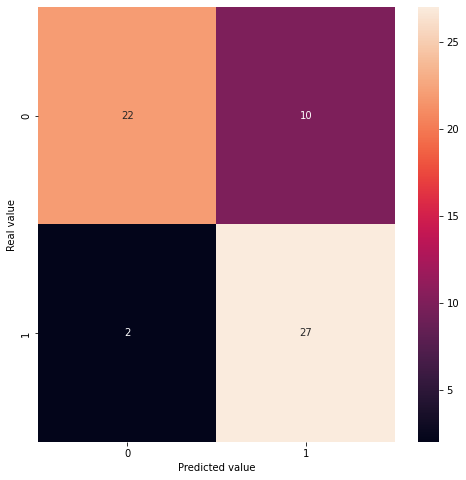

In [ ]:
# нужно получить кол-во правильных и неправильых предсказаний по каждому классу от knn

nn_mtx = metrics.confusion_matrix(y_test, y_knn)
print(f'nn_mtx = {nn_mtx}')

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

#### Precision

In [ ]:
precision_nn_22 = metrics.precision_score(y_test, y_knn)
precision_nn_22

0.7297297297297297

#### Recall

In [ ]:
recall_nn_22 = metrics.recall_score(y_test, y_knn)
recall_nn_22

0.9310344827586207

#### F-1

In [ ]:
f1_score_nn_22 = metrics.f1_score(y_test, y_knn)
f1_score_nn_22

0.8181818181818181

#### Report

In [ ]:
cls_report_nn_22 = (metrics.classification_report(y_test, y_knn))
print(cls_report_nn_22)

              precision    recall  f1-score   support

           0       0.50      0.41      0.45        29
           1       0.54      0.62      0.58        32

    accuracy                           0.52        61
   macro avg       0.52      0.52      0.52        61
weighted avg       0.52      0.52      0.52        61



#### AUC-ROC

In [ ]:
fpr,tpr, thresholds = metrics.roc_curve(y_test, y_knn)

In [ ]:
fpr

array([0.    , 0.3125, 1.    ])

In [ ]:
tpr

array([0.        , 0.93103448, 1.        ])

ROC-AUC = 0.8092672413793103


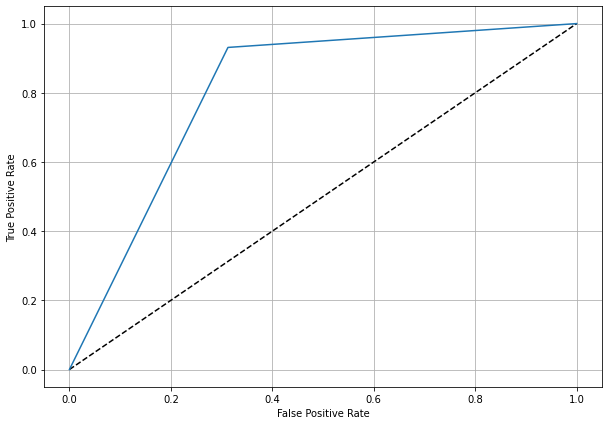

In [ ]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
# (результат плохой у монетки roc auc = 0.5, см classification report f1, классы разбалансированны)

print(f'ROC-AUC = {metrics.roc_auc_score(y_test,y_knn)}')

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)

#### PR-curve

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_knn)

In [ ]:
precision

array([0.47540984, 0.72972973, 1.        ])

In [ ]:
recall

array([1.        , 0.93103448, 0.        ])

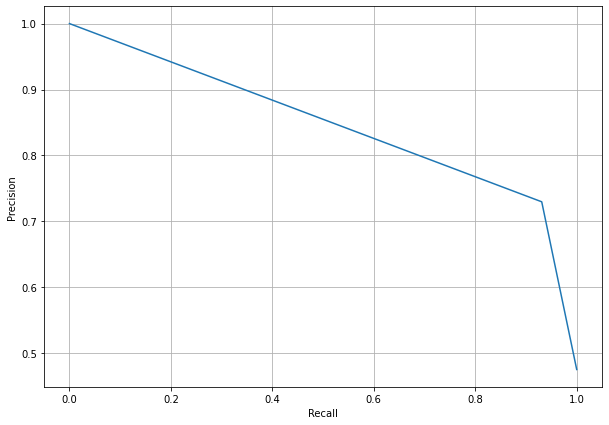

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.grid(True)

### 4.3.4 Сравним основные метрики графически

In [ ]:
accuracy_arr = np.array([accuracy_score_nn_28,accuracy_score_nn_26,accuracy_score_nn_22])
precision_arr = np.array([precision_nn_28,precision_nn_26,precision_nn_22])
recall_arr = np.array([recall_nn_28,recall_nn_26,recall_nn_22])
f1_score_arr = np.array([f1_score_nn_28,f1_score_nn_26,f1_score_nn_22])

Text(0.5, 0.98, 'Сравнение 4х метрик относительно разных n_neighbors')

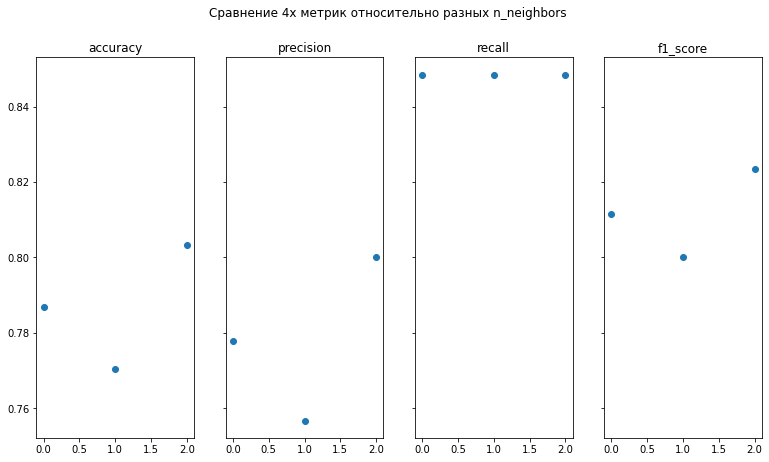

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(13, 7), sharey=True)
igrek = [0,1,2]
axs[0].scatter(igrek,accuracy_arr)
axs[0].set_title('accuracy')
axs[1].scatter(igrek,precision_arr)
axs[1].set_title('precision')
axs[2].scatter(igrek,recall_arr)
axs[2].set_title('recall')
axs[3].scatter(igrek,f1_score_arr)
axs[3].set_title('f1_score')
fig.suptitle('Сравнение 4х метрик относительно разных n_neighbors')

Как видно из графиков выше лучший показатель достигается при n_neighbors = 22 (слева направо 28,26,22)

# 5.Обучение алгоритма DecisionTree

## 5.1. Обучение DecisionTree без настроек

In [ ]:
# Будем использовать модель DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# инициализируем алгоритм
dt = DecisionTreeClassifier()
# разбиваем матрицу признаков и ответы на обучающую и тестовую выборки (80 / 20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
# обучаем алгоритм на train
dt.fit(X_train, y_train)
# получаем прогнозы на основе признаков test
preds = dt.predict(X_test)

# сравниваем полученные прогнозы с реальными ответами test с помощью метрик качества

# количество верно угаданных / количество всех ответов (! не стоит использовать при дизбалансе классов !)
metrics.accuracy_score(y_test, preds)

0.7540983606557377

У DecisionTree каждый раз почему-то новое значение у accuracy_score при каждом новом запуске 

[Text(0.5159313725490197, 0.95, 'X[11] <= -0.225\ngini = 0.492\nsamples = 242\nvalue = [106, 136]'),
 Text(0.2916666666666667, 0.85, 'X[12] <= 0.305\ngini = 0.36\nsamples = 140\nvalue = [33, 107]'),
 Text(0.16176470588235295, 0.75, 'X[9] <= 1.432\ngini = 0.192\nsamples = 102\nvalue = [11, 91]'),
 Text(0.10784313725490197, 0.65, 'X[7] <= -2.893\ngini = 0.151\nsamples = 97\nvalue = [8, 89]'),
 Text(0.08823529411764706, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12745098039215685, 0.55, 'X[4] <= 0.497\ngini = 0.135\nsamples = 96\nvalue = [7, 89]'),
 Text(0.0784313725490196, 0.45, 'X[12] <= -2.967\ngini = 0.05\nsamples = 78\nvalue = [2, 76]'),
 Text(0.0392156862745098, 0.35, 'X[2] <= 0.032\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0196078431372549, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.058823529411764705, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11764705882352941, 0.35, 'X[3] <= -1.292\ngini = 0.026\nsamples = 76\nvalue = [1, 75

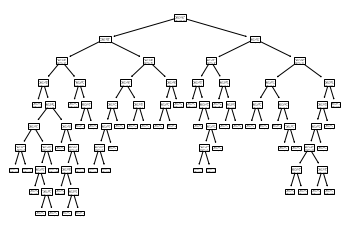

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

## 5.2. DecisionTree + GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Зададим сетку - среди каких значений выбирать наилучший параметр.
dt_grid = {'criterion' : np.array(['gini', 'entropy']),
          'max_depth': np.arange(1,10),
           'min_samples_split':np.arange(2,10),
           'min_samples_leaf':np.arange(1,10)} # перебираем по параметру criterion, max_depth

# Создаем объект кросс-валидации
gs = GridSearchCV(dt, dt_grid) # есть параметр scoring, можно выбрать как модель будет работать

# Обучаем его
gs.fit(X_scaled, y)

print(gs.best_params_, gs.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2} 0.8248633879781421


In [ ]:
gs.cv_results_

## 5.3. Обучим алгоритм DT с лучшими параметрами

In [ ]:
# импортируем и создаем DecisionTree классификатор по аналогии
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 6,
                           min_samples_split=2) 
# тренируем для knn
clf_dt = dt.fit(X_train, y_train)
# получаем от них предикты
y_dt = clf_dt.predict(X_test)

In [ ]:
# ответы DecisionTree
y_dt

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
# реальные ответы
y_test

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

## 5.4. Метрики

### Accuracy

In [ ]:
accuracy_score_dt = metrics.accuracy_score(y_test, y_dt)
accuracy_score_dt

0.819672131147541

### Confusion matrix

nn_mtx = [[20  9]
 [ 2 30]]


Text(0.5, 51.0, 'Predicted value')

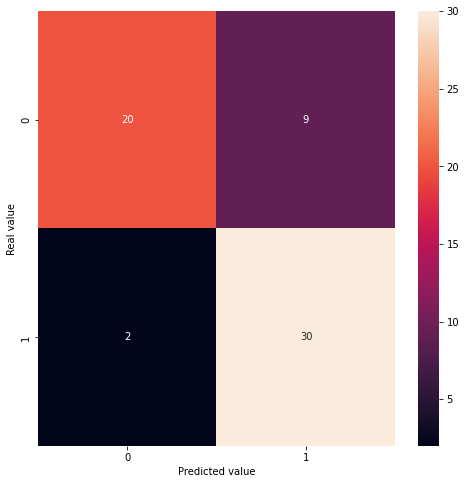

In [ ]:
# нужно получить кол-во правильных и неправильых предсказаний по каждому классу от knn

nn_mtx = metrics.confusion_matrix(y_test, y_dt)
print(f'nn_mtx = {nn_mtx}')

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

### Precision

In [ ]:
precision_dt = metrics.precision_score(y_test, y_dt)
precision_dt

0.7692307692307693

### Recall

In [ ]:
recall_dt = metrics.recall_score(y_test, y_dt)
recall_dt

0.9375

### F-1

In [ ]:
f1_score_dt = metrics.f1_score(y_test, y_dt)
f1_score_dt

0.8450704225352113

### Report

In [ ]:
cls_report_dt = metrics.classification_report(y_test, y_dt)
print(cls_report_dt)

              precision    recall  f1-score   support

           0       0.91      0.69      0.78        29
           1       0.77      0.94      0.85        32

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.84      0.82      0.82        61



### AUC-ROC

In [ ]:
fpr,tpr, thresholds = metrics.roc_curve(y_test, y_dt)

ROC-AUC = 0.8135775862068966


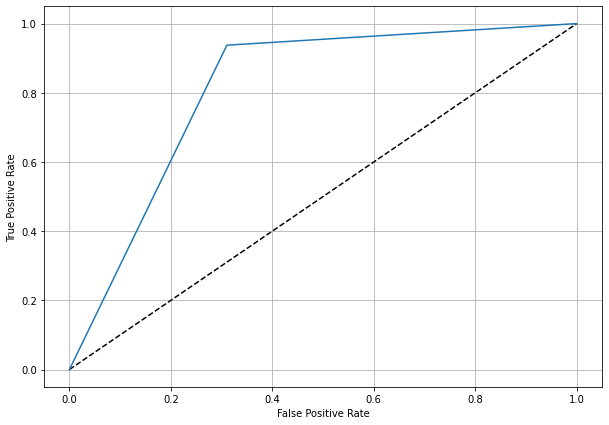

In [ ]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
# (результат плохой у монетки roc auc = 0.5, см classification report f1, классы разбалансированны)

print(f'ROC-AUC = {metrics.roc_auc_score(y_test,y_dt)}')

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)

### PR-Curve

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_dt)

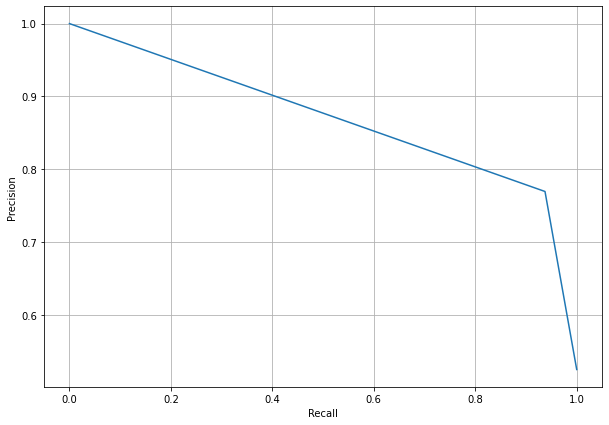

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.grid(True)

# 6.Сравню лучшие метрики KNN и DT

In [ ]:
knn_arr = np.array([accuracy_score_nn_22, precision_nn_22, recall_nn_22, f1_score_nn_22])
knn_arr

array([0.80327869, 0.72972973, 0.93103448, 0.81818182])

In [ ]:
dt_arr = np.array([accuracy_score_dt, precision_dt, recall_dt, f1_score_dt])
dt_arr

array([0.81967213, 0.76923077, 0.9375    , 0.84507042])

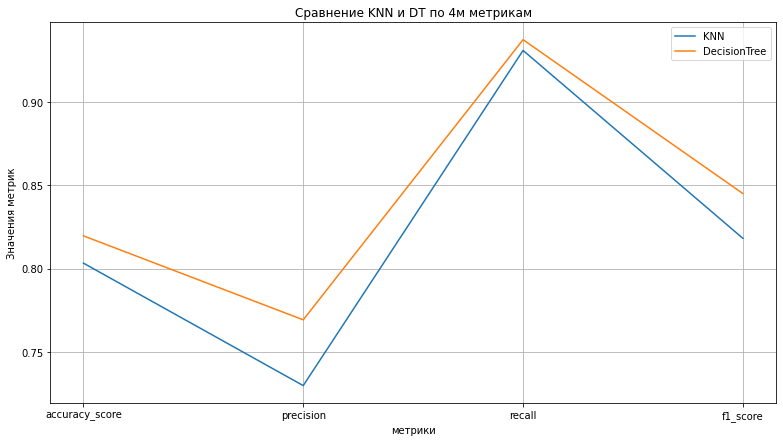

In [ ]:
plt.figure(figsize=(13,7))
plt.plot(np.array(['accuracy_score','precision','recall','f1_score']), knn_arr, label = 'KNN')
plt.plot(np.array(['accuracy_score','precision','recall','f1_score']), dt_arr, label = 'DecisionTree')
plt.xlabel('метрики')
plt.ylabel('Значения метрик')
plt.title('Сравнение KNN и DT по 4м метрикам')
plt.legend()
plt.grid(True)

Вывод: алгоритм  DecisionTree отработал немного лучше чем KNN